In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [4]:
customer_df.columns=[e.lower().replace(' ', '_') for e in customer_df.columns]  


In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df.effective_to_date)

In [6]:
def converter(data):
    objects=data.select_dtypes("object")
    numbers=data.select_dtypes(np.number)
    numbernames=numbers.columns
    
    continius=[]
    discrete= []
    for i in numbernames:

        if len(data[i].unique()) > 202:
            
            continius.append(i)
        
        
        else:
            
            discrete.append(i)
            
    DiscreteValues=data[discrete]
    ContiniusValues=data[continius]
    
    return objects,DiscreteValues,ContiniusValues

In [52]:
cat,Disc,Conti= converter(customer_df)

(9134, 5)

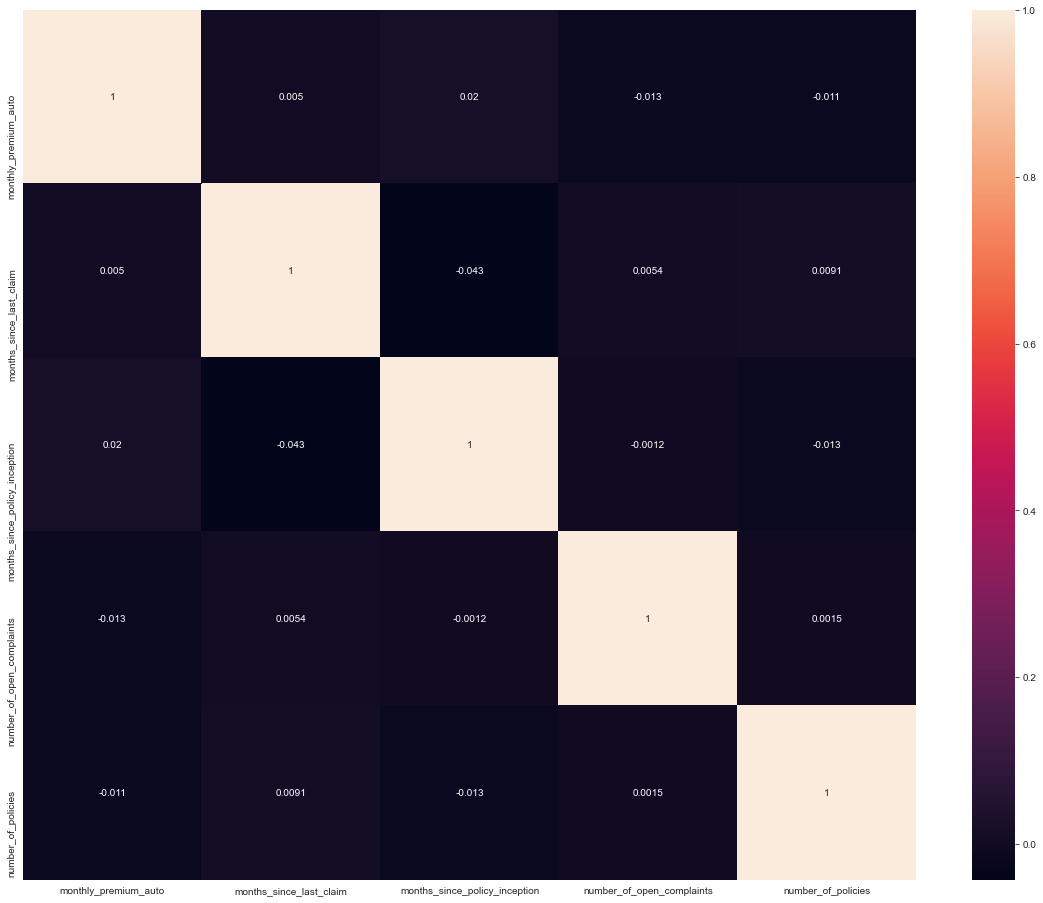

In [9]:
corr_matrix=Disc.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

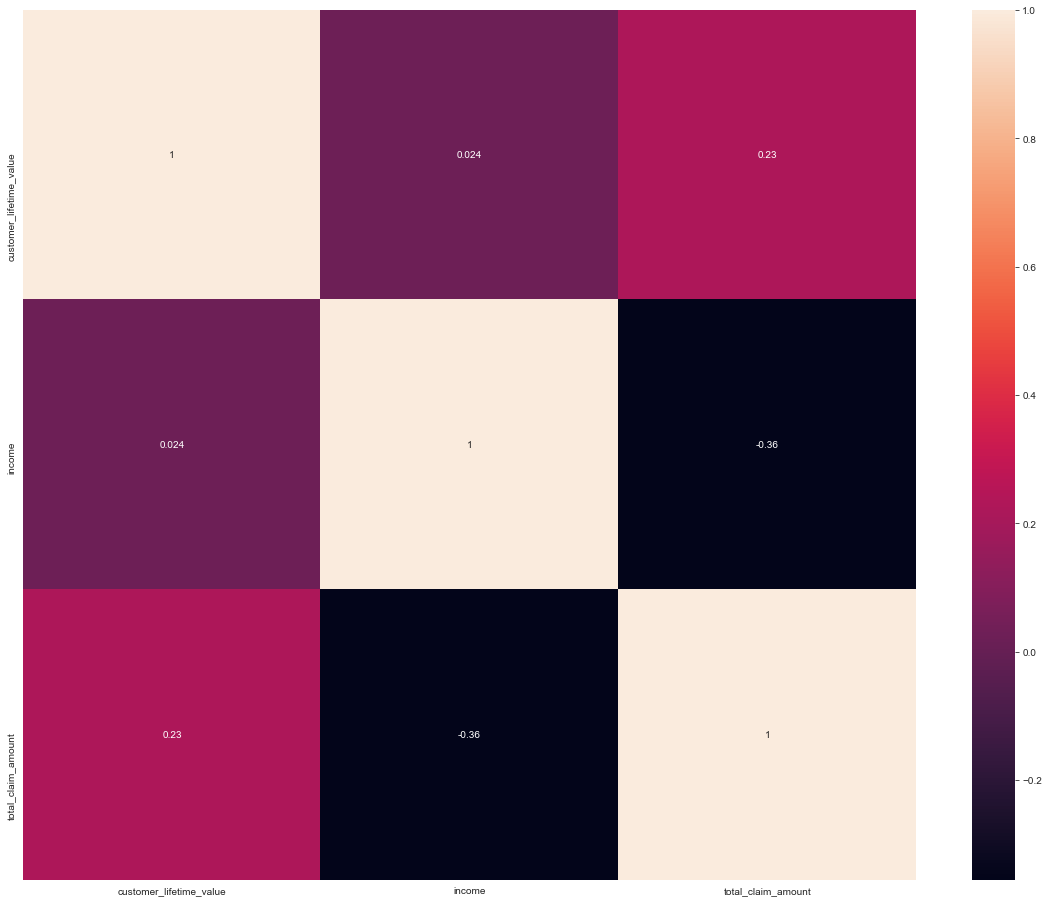

In [11]:
corr_matrix=Conti.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

 It seems like tht our continious and discrete Values are independent, which is super great

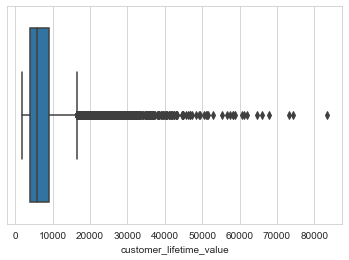

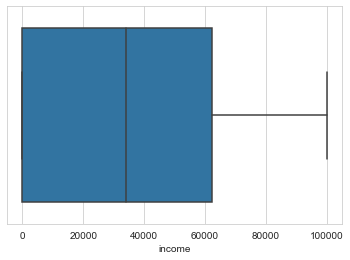

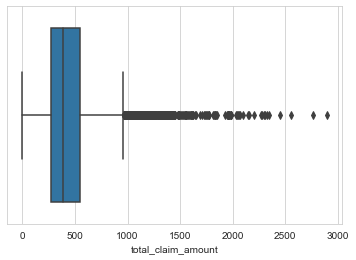

In [47]:
for col in Conti.columns:
    sns.boxplot(col, data=Conti)
    plt.show()

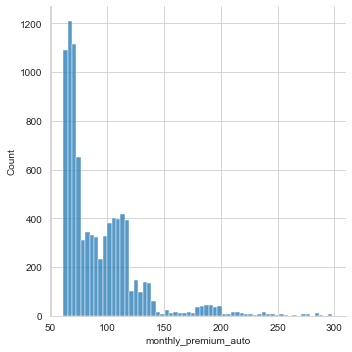

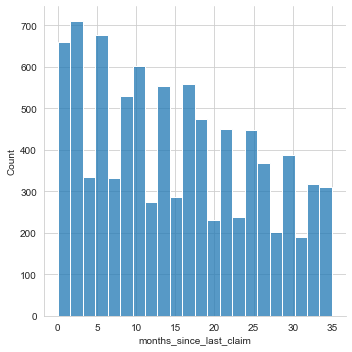

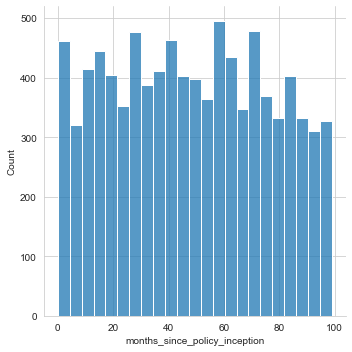

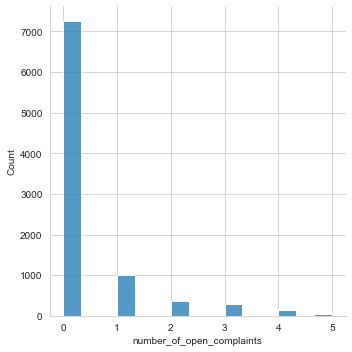

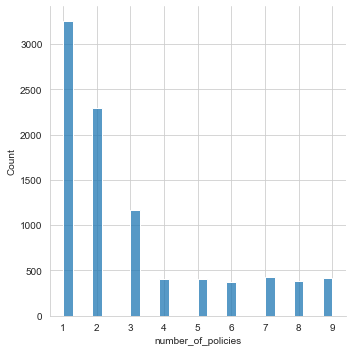

In [25]:
for col in Disc.columns:
    sns.displot(Disc[col])
    plt.show()

we have some outliers in our columns and have to do something with them

In [40]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: 
        return np.log(x)
    else:
        return x 

In [44]:
Conti["total_claim_amount"]=list(map(log_transfom_clean_, Conti['total_claim_amount']))

I tried to log transform but its gave us more outliers but just on the other side 

In [53]:
iqr = np.percentile(Disc['monthly_premium_auto'],75) - np.percentile(Disc['monthly_premium_auto'],25) #interquartile range
upper_limit = np.percentile(Disc['monthly_premium_auto'],75) + 1.5*iqr #whysker positions
lower_limit = np.percentile(Disc['monthly_premium_auto'],25) - 1.5*iqr

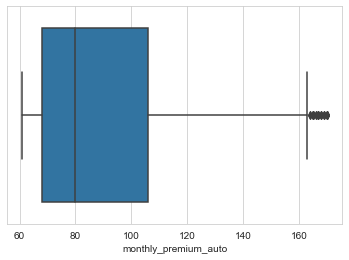

In [54]:
customer_df = customer_df[(Disc['monthly_premium_auto']>lower_limit) & (Disc['monthly_premium_auto']<upper_limit)]#filter data through whyskers
sns.boxplot(Disc['monthly_premium_auto'])
plt.show()

## checking for NaN

In [56]:
nulls = pd.DataFrame(Conti.isnull().sum()/len(customer_df))
nulls

,0
customer_lifetime_value,0.0
income,0.0
total_claim_amount,0.0


In [57]:
nulls = pd.DataFrame(Disc.isnull().sum()/len(customer_df))
nulls

,0
monthly_premium_auto,0.0
months_since_last_claim,0.0
months_since_policy_inception,0.0
number_of_open_complaints,0.0
number_of_policies,0.0


## See Lab One 